# UC San Diego: Data Science in Practice - EDA Checkpoint
### Summer Session I 2023 | Instructor : C. Alex Simpkins Ph.D.

## Draft project title if you have one (can be changed later)

(This checkpoint helps you to perform your EDA on your data for your project. You can remove this text description. Consider this the next step in your final project. See the project readme for bullet points to check off in terms of details to include beyond the main section heading content below.)

# Names

- Jana Bridi
- Rawan Ghazouli
- Nargis Ahmadi

<a id='research_question'></a>
# Research Question

Are hate crimes motivated by racial prejudice alone significantly more prevalent than hate crimes motivated by Sexual Orientation in the distribution of hate crimes in San Diego in the past 7 years?

# Setup

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact

# upload the dataset into Github public repository which contain the datset is in CSV file
# use the following code to load and explore the dataset
data_path = 'https://raw.githubusercontent.com/wanzouli/team18_selfcreated/main/hate_crimes_datasd.csv'
df = pd.read_csv(data_path)

df.head()      # display the first few rows of the dataset
df.info()      # summary information about the dataset
df.describe()  # descriptive statistics of numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_number         266 non-null    int64  
 1   date                266 non-null    object 
 2   year                266 non-null    int64  
 3   month               266 non-null    int64  
 4   time                266 non-null    object 
 5   date_time           266 non-null    object 
 6   crime_code          266 non-null    object 
 7   crime               266 non-null    object 
 8   block               258 non-null    float64
 9   street              266 non-null    object 
 10  type                252 non-null    object 
 11  beat                266 non-null    int64  
 12  command             266 non-null    object 
 13  weapon              266 non-null    object 
 14  motivation          266 non-null    object 
 15  number_of_suspects  266 non-null    object 
 16  suspect 

,case_number,year,month,block,beat,victim_count
count,2.660000e+02,266.000000,266.000000,258.000000,266.000000,265.000000
mean,1.885842e+07,2018.823308,6.003759,4318.627907,488.439850,1.200000
std,2.091110e+06,2.078366,3.304083,3187.443564,248.035432,0.523682
min,1.600046e+07,2016.000000,1.000000,0.000000,111.000000,0.000000
25%,1.701528e+07,2017.000000,3.000000,1625.000000,246.000000,1.000000
50%,1.900478e+07,2019.000000,6.000000,4000.000000,521.000000,1.000000
75%,2.101681e+07,2021.000000,9.000000,5775.000000,627.000000,1.000000
max,2.260380e+07,2022.000000,12.000000,13300.000000,935.000000,4.000000


# Data Cleaning

Describe your data cleaning steps here.

In [2]:
# to select the columns that we need to answer our research question 

df = df.loc[:, ['year', 'crime', 'motivation', 'weapon', 'injury']]
df.head() 

# keep only 'Race' and 'Sexual Orientation' in motivation column 
values_to_keep = ['Race','Sexual Orientation']
motivation_data = df[df['motivation'].isin(values_to_keep)]


#remove any missing values from the motivation column 
motivation_data = motivation_data.dropna(subset=['motivation'])

motivation_data.shape
motivation_data.head(40)

,year,crime,motivation,weapon,injury
0,2016,"Assault, No Weapon",Race,"Hands, Fists, Feet",Hospital
1,2016,"Assault, w/Weapon",Race,Stick,No Treat.
2,2016,Vandalism,Race,Marker,None
3,2016,"Threat, Phone Call",Race,Phone,None
4,2016,Threat,Race,Knife,None
5,2016,Vandalism,Race,Paint,None
8,2016,"Assault, No Weapon",Race,"Hands, Fists, Feet",No Treat.
9,2016,Threat,Race,Knife,None
10,2016,Other,Race,Knife,None
11,2016,"Threat, Phone Call",Race,Phone,None


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

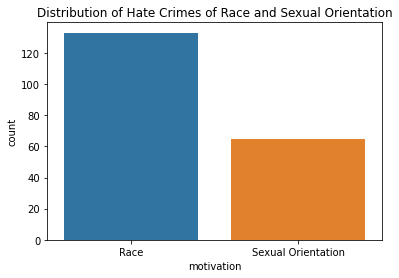

In [3]:
# create visualizations to explore the distribution of hate crimes by race and sexual orientation
sns.countplot(x='motivation', data= motivation_data)
plt.title('Distribution of Hate Crimes of Race and Sexual Orientation')
plt.show()

### Results of the above code section 

the visualizations suggest that a higher count of hate crimes are motivated by racial prejudice compared to those motivated by sexual orientation


-
-
-
-
-
-





In [4]:
motivation_counts = motivation_data['motivation'].value_counts()
motivation_proportions = motivation_data['motivation'].value_counts(normalize=True)
motivation_proportions

print("Counts of 'motivation' values:")
print(motivation_counts)
print()

print("Proportions of 'motivation' values:")
print(motivation_proportions)
print()

Counts of 'motivation' values:
Race                  133
Sexual Orientation     65
Name: motivation, dtype: int64

Proportions of 'motivation' values:
Race                  0.671717
Sexual Orientation    0.328283
Name: motivation, dtype: float64



### Results of the above code section 


- Hate crimes motivated by Race: 67.17%
- Hate crimes motivated by Sexual Orientation: 32.83%

These proportions represent the distribution of hate crimes in the dataset with respect to the two motivations: racial prejudice and sexual orientation. The values suggest that a higher proportion of hate crimes are motivated by racial prejudice (67.17%) compared to those motivated by sexual orientation (32.83%) in the dataset under analysis.




Trendline of Hate Crimes based on Motivation:
      Race  Sexual Orientation
year                          
2016  22.0                14.0
2017  18.0                11.0
2018  21.0                13.0
2019   8.0                 8.0
2020  17.0                 7.0
2021  26.0                12.0
2022  21.0                 NaN


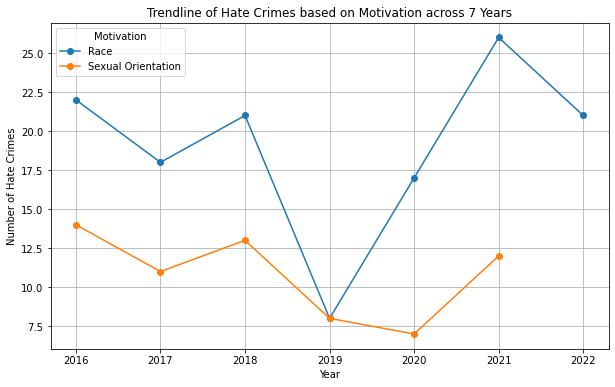

In [6]:
# Group the data by 'year' and 'motivation' and count the number of hate crimes in each group
motivation_counts_by_year = motivation_data.groupby(['year', 'motivation'])['crime'].count().unstack()

# Create a table to display the trendline of hate crimes based on motivation over the years
trendline_table = pd.DataFrame(motivation_counts_by_year)

# Rename the columns for clarity
trendline_table.columns = ['Race', 'Sexual Orientation']

# Display the trendline table
print("Trendline of Hate Crimes based on Motivation:")
print(trendline_table)

# Plot the trendline for 'Race' and 'Sexual Orientation' motivations over the years
motivation_counts_by_year.plot(marker='o', linestyle='-', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Hate Crimes')
plt.title('Trendline of Hate Crimes based on Motivation across 7 Years')
plt.legend(title='Motivation', loc='best')
plt.grid(True)
plt.show()

### Results of the above code section 

year relationship with motivation -- major difference in the last three years 



-
-
-
-
-
-





In [ ]:
# Data Analysis & Results (EDA) - Fisher Test

# Count the number of hate crimes for each motivation category
motivation_counts = motivation_data['motivation'].value_counts()

# create visualizations to explore the distribution of hate crimes by race and sexual orientation
sns.countplot(x='motivation', data= motivation_data)
plt.title('Distribution of Hate Crimes of Race and Sexual Orientation')
plt.show()

# Calculate the percentage of hate crimes for each motivation category
motivation_percentages = (motivation_counts / len(motivation_data)) * 100

# Display the percentage of hate crimes for each motivation category
print("Percentage of Hate Crimes based on Motivation:")
print(motivation_percentages)

# Calculate the total number of hate crimes
total_hate_crimes = len(motivation_data)

# Calculate the number of hate crimes motivated by racial prejudice (Race)
racial_hate_crimes = len(motivation_data[motivation_data['motivation'] == 'Race'])

# Calculate the number of hate crimes motivated by other factors (Sexual Orientation)
sexual_orientation_hate_crimes = len(motivation_data[motivation_data['motivation'] == 'Sexual Orientation'])

# Perform a Fisher's exact test to check if hate crimes motivated by racial prejudice are significantly more prevalent
# than hate crimes motivated by other factors
odds_ratio, p_value = fisher_exact([[racial_hate_crimes, sexual_orientation_hate_crimes],
                                    [total_hate_crimes - racial_hate_crimes, total_hate_crimes - sexual_orientation_hate_crimes]])

# Display the results of the Fisher's exact test
print("Fisher's exact test results:")
print("Odds Ratio:", odds_ratio)
print("p-value:", p_value)

# Create a trendline for the number of hate crimes based on motivation ('Race' and 'Sexual Orientation') over the years
motivation_counts_by_year = motivation_data.groupby(['year', 'motivation'])['crime'].count().unstack()

# # Plot the trendline for 'Race' and 'Sexual Orientation' motivations over the years
# motivation_counts_by_year.plot(marker='o', linestyle='-', figsize=(10, 6))
# plt.xlabel('Year')
# plt.ylabel('Number of Hate Crimes')
# plt.title('Trendline of Hate Crimes based on Motivation')
# plt.legend(title='Motivation', loc='best')
# plt.grid(True)
# plt.show()

### Results of the above code section 


p-value (1.0511172264361364e-11) < 0.05


In hypothesis testing, the general rule is that if the p-value is less than the chosen significance level (alpha), which is usually set at 0.05, then we reject the null hypothesis. A small p-value indicates strong evidence against the null hypothesis, suggesting that the observed association between the two categorical variables (racial prejudice and sexual orientation) is not due to random chance but is statistically significant.

Therefore, with such a small p-value (1.0511172264361364e-11), you would reject the null hypothesis, and you would conclude that upon analyzing this data and our findings using the fisher test ---  hate crimes motivated by racial prejudice alone are significantly more prevalent than hate crimes motivated by sexual orientation in the distribution of hate crimes in San Diego in the past 7 years, supporting your research hypothesis.





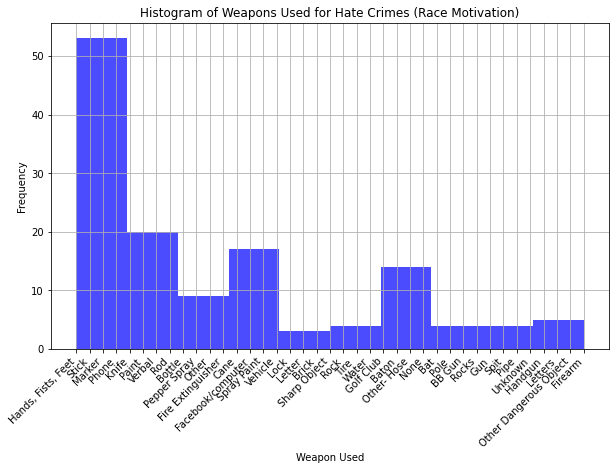

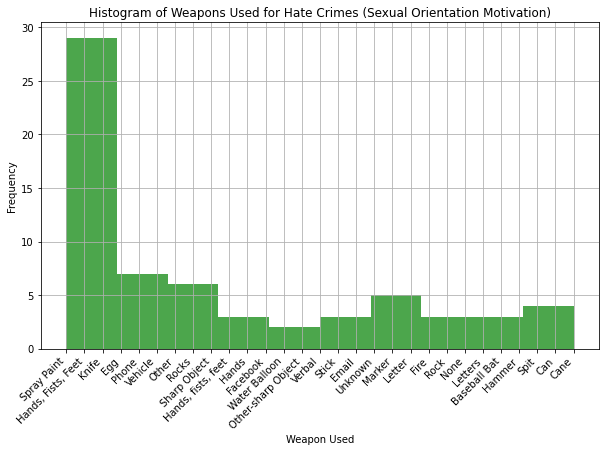

In [7]:
# ANALYZING THE RELATIONSHIP BETWEEN MOTIVATION AND WEAPON USED 

# Separate the data for each motivation ('Race' and 'Sexual Orientation')
df_race = motivation_data[motivation_data['motivation'] == 'Race']
df_sexual_orientation = motivation_data[motivation_data['motivation'] == 'Sexual Orientation']

# Create histograms for weapons used for 'Race' motivation
plt.figure(figsize=(10, 6))
plt.hist(df_race['weapon'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Weapon Used')
plt.ylabel('Frequency')
plt.title('Histogram of Weapons Used for Hate Crimes (Race Motivation)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Create histograms for weapons used for 'Sexual Orientation' motivation
plt.figure(figsize=(10, 6))
plt.hist(df_sexual_orientation['weapon'], bins=10, color='green', alpha=0.7)
plt.xlabel('Weapon Used')
plt.ylabel('Frequency')
plt.title('Histogram of Weapons Used for Hate Crimes (Sexual Orientation Motivation)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### Results of the above code section 

weapon use relationship with motivation 



-
-
-
-
-
-


